In [1]:
# General data libraries
import pandas as pd
import numpy as np

# Figures
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
sns.set()
from pywaffle import Waffle
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import squarify
import matplotlib.ticker as mtick

import json

# Dataframe column views
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Stats
from scipy.stats import chi2_contingency

# ACP
from sklearn import decomposition, manifold
from ACP_functions_02 import *

# ML
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from yellowbrick.features import Manifold

import time


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Import of cleaning functions
from cleaning59 import na_rows_list, na_raw_drop_df, min_row_data_rate_list, min_row_data_rate_df, column_data_rate, column_data_rate_mean, columns_not_in_list, columns_delete_df, min_column_data_rate_df, low_outlier_filter_df, high_outlier_filter_df, dic_high_outlier_filter_df, word_column_filter_df, word_column_filter_lst, sign_invert_filter_df, common_elements, separate_elements 

In [4]:
# Import of graph functions
from plotting03 import bi_joint_plot

In [5]:
# Import of ML functions
from ML20 import OneHotEncoder, label_encoding_transform_with_merge, target_encoding_transform_with_merge, vector_encoding_transform_with_merge, encoding_transform_with_merge

# DATA READING

## customers_dataset

In [6]:
# data reading and viewing
customers_dataset = pd.read_csv('projets\\05_olist_customer_segmentation\\olist_customers_dataset.csv',sep=',',dtype='object')
customers_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,03937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,06764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


## geolocation_dataset

In [7]:
# data reading and viewing
geolocation_dataset = pd.read_csv('projets\\05_olist_customer_segmentation\\olist_geolocation_dataset.csv',sep=',',dtype='object')
geolocation_dataset

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.54562128115268,-46.63929204800168,sao paulo,SP
1,01046,-23.546081127035535,-46.64482029837157,sao paulo,SP
2,01046,-23.54612896641469,-46.64295148361138,sao paulo,SP
3,01041,-23.5443921648681,-46.63949930627844,sao paulo,SP
4,01035,-23.541577961711493,-46.64160722329613,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.06863887662893,-52.01070524698279,tapejara,RS
1000159,99900,-27.877125117712357,-52.22488216264145,getulio vargas,RS
1000160,99950,-28.07185541645192,-52.01471586864233,tapejara,RS
1000161,99980,-28.388931876600495,-51.84687132274168,david canabarro,RS


## order_items_dataset

In [8]:
# data reading and viewing
order_items_dataset = pd.read_csv('projets\\05_olist_customer_segmentation\\olist_order_items_dataset.csv',sep=',',dtype='object')
order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


## order_payments_dataset

In [9]:
# data reading and viewing
order_payments_dataset = pd.read_csv('projets\\05_olist_customer_segmentation\\olist_order_payments_dataset.csv',sep=',',dtype='object')
order_payments_dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


## order_reviews_dataset

In [10]:
# data reading and viewing
order_reviews_dataset = pd.read_csv('projets\\05_olist_customer_segmentation\\olist_order_reviews_dataset.csv',sep=',',dtype='object')
order_reviews_dataset

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


## orders_dataset

In [11]:
# data reading and viewing
orders_dataset = pd.read_csv('projets\\05_olist_customer_segmentation\\olist_orders_dataset.csv',sep=',',dtype='object')
orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


## products_dataset

In [12]:
# data reading and viewing
products_dataset = pd.read_csv('projets\\05_olist_customer_segmentation\\olist_products_dataset.csv',sep=',',dtype='object')
products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45,67,2,12300,40,40,40
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41,971,1,1700,16,19,16
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50,799,1,1400,27,7,27
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60,156,2,700,31,13,20


## sellers_dataset

In [ ]:
# data reading and viewing
sellers_dataset = pd.read_csv('projets\\05_olist_customer_segmentation\\olist_sellers_dataset.csv',sep=',',dtype='object')
sellers_dataset

## product_category_name_translation

In [ ]:
# data reading and viewing
product_category_name_translation_dataset = pd.read_csv('projets\\05_olist_customer_segmentation\\product_category_name_translation.csv',sep=',',dtype='object')
product_category_name_translation_dataset

## closed_deals_dataset

In [ ]:
# data reading and viewing
closed_deals_dataset = pd.read_csv('projets\\05_olist_customer_segmentation\\Marketing_Funnel_by_Olist\\olist_closed_deals_dataset.csv',sep=',',dtype='object')
closed_deals_dataset

## marketing_qualified_leads_dataset

In [ ]:
# data reading and viewing
marketing_qualified_leads_dataset = pd.read_csv('projets\\05_olist_customer_segmentation\\Marketing_Funnel_by_Olist\\olist_marketing_qualified_leads_dataset.csv',sep=',',dtype='object')
marketing_qualified_leads_dataset

## Train part

In [ ]:
# CSV file reading
customer_agg_train = pd.read_csv(f'projets\\05_olist_customer_segmentation\\production\\olist_customer_aggregation_train.csv',sep=',')


# DATASET CLEANING

## Check of duplicated values

In [ ]:
# Check for duplicated values
customers_dataset.duplicated(keep='last').value_counts()

In [ ]:
# Check for duplicated values
geolocation_dataset.duplicated(keep='last').value_counts()

In [ ]:
# Duplicated rows are deleted
geolocation_dataset.drop_duplicates(keep='last')

In [ ]:
# Check for duplicated values
order_items_dataset.duplicated(keep='last').value_counts()

In [ ]:
# Duplicated rows are deleted
order_items_dataset.drop_duplicates(keep='last')

In [ ]:
# Check for duplicated values
order_payments_dataset.duplicated(keep='last').value_counts()

In [ ]:
# Check for duplicated values
order_reviews_dataset.duplicated(keep='last').value_counts()

In [ ]:
# Check for duplicated values
orders_dataset.duplicated(keep='last').value_counts()

In [ ]:
# Check for duplicated values
products_dataset.duplicated(keep='last').value_counts()

In [ ]:
# Duplicated rows are deleted
products_dataset.drop_duplicates(keep='last')

In [ ]:
# Check for duplicated values
sellers_dataset.duplicated(keep='last').value_counts()

# DATA PREPARATION

In [ ]:
# Number of customers_unique
customers_dataset['customer_unique_id'].nunique()

## 'customer_unique_id'

### orders_dataset

In [ ]:
orders_dataset.shape

In [ ]:
# Check of column similarities and data loss for 'customer_unique_id' (no data loss if zero or negative)
orders_dataset['customer_id'].nunique() - customers_dataset['customer_id'].nunique()

In [ ]:
# Checking that all values of the key column from the left dataframe are covered
left_lst = list(orders_dataset['customer_id'].unique())
right_lst = list(customers_dataset['customer_id'].unique())
len(common_elements(left_lst, right_lst))

In [ ]:
# checking status values
orders_dataset['order_status'].value_counts()

In [34]:
# filtering status
orders_dataset = orders_dataset[orders_dataset['order_status']=='delivered']

In [35]:
# DataFrame merging
orders_dataset = orders_dataset.merge(customers_dataset[['customer_id','customer_unique_id']], on='customer_id', how='left')
orders_dataset.shape

(96478, 9)

### order_payments_dataset

In [36]:
order_payments_dataset.shape

(103886, 5)

In [37]:
# Check of column similarities and data loss for 'customer_unique_id' (no data loss if zero or negative)
order_payments_dataset['order_id'].nunique() - orders_dataset['order_id'].nunique()

2962

In [38]:
# Checking that all values of the key column from the left dataframe are covered
left_lst = list(order_payments_dataset['order_id'].unique())
right_lst = list(orders_dataset['order_id'].unique())
len(common_elements(left_lst, right_lst))

Liste 1: 99440
Liste 2: 96478


Common elements: 


96477

In [39]:
# DataFrame merging
order_payments_dataset = order_payments_dataset.merge(orders_dataset[['order_id','customer_unique_id']], on='order_id', how='left')
order_payments_dataset.shape

(103886, 6)

### order_reviews_dataset

In [40]:
order_reviews_dataset.shape

(99224, 7)

In [41]:
# Check of column similarities and data loss for 'customer_unique_id' (no data loss if zero or negative)
order_reviews_dataset['order_id'].nunique() - orders_dataset['order_id'].nunique()

2195

In [42]:
# Checking that all values of the key column from the left dataframe are covered
left_lst = list(order_reviews_dataset['order_id'].unique())
right_lst = list(orders_dataset['order_id'].unique())
len(common_elements(left_lst, right_lst))

Liste 1: 98673
Liste 2: 96478


Common elements: 


95832

In [43]:
# DataFrame merging
order_reviews_dataset = order_reviews_dataset.merge(orders_dataset[['order_id','customer_unique_id']], on='order_id', how='left')
order_reviews_dataset.shape

(99224, 8)

### order_items_dataset

In [44]:
order_items_dataset.shape

(112650, 7)

In [45]:
# Check of column similarities and data loss for 'customer_unique_id' (no data loss if zero or negative)
order_items_dataset['product_id'].nunique() - orders_dataset['order_id'].nunique()

-63527

In [46]:
# Checking that all values of the key column from the left dataframe are covered
left_lst = list(order_items_dataset['order_id'].unique())
right_lst = list(orders_dataset['order_id'].unique())
len(common_elements(left_lst, right_lst))

Liste 1: 98666
Liste 2: 96478


Common elements: 


96478

In [47]:
# DataFrame merging
order_items_dataset = order_items_dataset.merge(orders_dataset[['order_id','customer_unique_id']], on='order_id', how='left')
order_items_dataset.shape

(112650, 8)

### products_dataset

In [48]:
products_dataset.shape

(32951, 9)

In [49]:
# Check of column similarities and data loss for 'customer_unique_id' (no data loss if zero or positive)
products_dataset['product_id'].nunique() - order_items_dataset['product_id'].nunique()

0

In [50]:
# Checking that all values of the key column from the left dataframe are covered
left_lst = list(products_dataset['product_id'].unique())
right_lst = list(order_items_dataset['product_id'].unique())
len(common_elements(left_lst, right_lst))

Liste 1: 32951
Liste 2: 32951


Common elements: 


32951

In [51]:
# DataFrame merging
products_dataset = products_dataset.merge(order_items_dataset, on='product_id', how='left')
products_dataset.shape

(112650, 16)

In [52]:
# One example
order_items_dataset[order_items_dataset['product_id']=='83808703fc0706a22e264b9d75f04a2e']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id
29026,420937423f0cb3d3fe689330b5d385a9,1,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,2017-10-26 02:49:13,39.71,16.11,1fd97aeef909db302af3962152746e9e
29027,420937423f0cb3d3fe689330b5d385a9,2,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,2017-10-26 02:49:13,39.71,16.11,1fd97aeef909db302af3962152746e9e
39538,59e88b7d3675e89aceaf86f372d3bc9a,1,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,4d1bbadcfd9bdc738e54599627870319
39539,59e88b7d3675e89aceaf86f372d3bc9a,2,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,4d1bbadcfd9bdc738e54599627870319
48515,6e4465d771f02e4fe335225de3c6c043,1,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,2cc893f1618b7317170ba2456cf76117
48516,6e4465d771f02e4fe335225de3c6c043,2,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,2cc893f1618b7317170ba2456cf76117
48517,6e4465d771f02e4fe335225de3c6c043,3,83808703fc0706a22e264b9d75f04a2e,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,2cc893f1618b7317170ba2456cf76117


One product_id can correspond to several customer_unique_id. Then the number of rows is increased after merging for products_dataset

## Time period

In [53]:
# We choose the minimum date as follow: '2017-01-01'
orders_dataset = orders_dataset[orders_dataset['order_purchase_timestamp']>='2017-01-01']

## Time extract

In [54]:
# Casting
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])

In [55]:
# Extracting the year and the month
orders_dataset['year'] = orders_dataset['order_purchase_timestamp'].dt.strftime('%Y')
orders_dataset['month'] = orders_dataset['order_purchase_timestamp'].dt.strftime('%m')

In [56]:
# Casting
orders_dataset['year'] = pd.to_numeric(orders_dataset['year'])
orders_dataset['month'] = pd.to_numeric(orders_dataset['month'])

In [57]:
def total_month_number(year, month, year_start=2017):
    """Calculate the total number of months from the beginning"""
    
    year_diff = year - year_start
    
    total_month_number = month + 12*year_diff
    
    return total_month_number
        

In [58]:
orders_dataset['total_month_number'] = orders_dataset.apply(lambda row: total_month_number(row['year'], row['month']), axis=1)
orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,year,month,total_month_number
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,2017,10,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,2018,7,19
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,2018,8,20
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,2017,11,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,2018,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,2017,3,3
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,2018,2,14
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,2017,8,8
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,2018,1,13


In [59]:
orders_dataset.drop(['year','month'], axis=1, inplace=True)
orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,total_month_number
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,19
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,20
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,14
...,...,...,...,...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,3
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,14
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,8
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,13


In [60]:
orders_dataset['total_month_number'].unique()

array([10, 19, 20, 11, 14,  7,  5,  1, 18, 15, 13, 12,  9, 17,  8, 16,  3,
        6,  2,  4], dtype=int64)

## Category translation

In [61]:
# Check of column similarities and data loss for customer_unique_id' (no data loss if zero or negative)
products_dataset['product_category_name'].nunique() - product_category_name_translation_dataset['product_category_name'].nunique()

2

In [62]:
# Checking of product lists between 2 dataframes

for category in products_dataset['product_category_name'].unique():
    if category not in product_category_name_translation_dataset['product_category_name'].unique():
        print(category)

nan
pc_gamer
portateis_cozinha_e_preparadores_de_alimentos


Some categories miss their translation with the dataframe given

In [63]:
# Adding a row to the dataframe
product_category_name_translation_dataset = product_category_name_translation_dataset.append({'product_category_name':'pc_gamer', 'product_category_name_english':'pc_gamer'}, ignore_index=True) 

In [64]:
# Adding a row to the dataframe
product_category_name_translation_dataset = product_category_name_translation_dataset.append({'product_category_name':'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english':'preparated_and_transported_food'}, ignore_index=True) 

In [65]:
product_category_name_translation_dataset

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [66]:
# Check of column similarities and data loss for 'customer_unique_id' (no data loss if zero or negative)
products_dataset['product_category_name'].nunique() - product_category_name_translation_dataset['product_category_name'].nunique()

0

In [67]:
# DataFrame merging
products_dataset = products_dataset.merge(product_category_name_translation_dataset[['product_category_name','product_category_name_english']], on='product_category_name', how='left')

In [68]:
products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,b1a1199364a4a7fe27c4486ab63f550d,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,4b86049cb99e4aa774031daa9cd18f18,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,f63805d9c7edb84d92413af34b86a39c,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,619e926d09b26efbd5180368b1ddc874,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,ad353b4fb0e294adc4eda48af73e68a6,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60,156,2,700,31,13,20,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,4d1bbadcfd9bdc738e54599627870319,computers_accessories
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60,156,2,700,31,13,20,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,2cc893f1618b7317170ba2456cf76117,computers_accessories
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60,156,2,700,31,13,20,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,2cc893f1618b7317170ba2456cf76117,computers_accessories
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60,156,2,700,31,13,20,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,2cc893f1618b7317170ba2456cf76117,computers_accessories


## Hierarchical product categories

In [69]:
product_category_01 = ['health_beauty', 'perfumery']

In [70]:
product_category_02 = ['computers_accessories', 'telephony', 'tablets_printing_image',
                       'fixed_telephony', 'consoles_games', 'audio', 'office_furniture',
                       'electronics', 'computers', 'pc_gamer']

In [71]:
product_category_03 = ['auto', 'stationery', 'signaling_and_security']

In [72]:
product_category_04 = ['furniture_decor', 'housewares', 'small_appliances',
                       'air_conditioning', 'kitchen_dining_laundry_garden_furniture',
                       'home_appliances', 'party_supplies', 'home_confort',
                       'furniture_mattress_and_upholstery',
                       'furniture_living_room', 'furniture_bedroom',
                       'christmas_supplies', 'home_appliances_2', 'home_comfort_2',
                       'small_appliances_home_oven_and_coffee',
                       'flowers', 'la_cuisine']

In [73]:
product_category_05 = ['garden_tools','construction_tools_construction',
                       'costruction_tools_garden', 'costruction_tools_tools', 'books_technical',
                       'books_technica', 'home_construction',
                       'construction_tools_lights', 'construction_tools_safety']

In [74]:
product_category_06 = ['watches_gifts', 'fashion_bags_accessories', 'fashion_shoes',
                       'cool_stuff', 'luggage_accessories', 'fashion_male_clothing',
                       'fashion_underwear_beach', 'fashion_sport',
                       'fashio_female_clothing', 'sports_leisure']

In [75]:
product_category_07 = ['food_drink', 'food', 'drinks', 'preparated_and_transported_food']

In [76]:
product_category_08 = ['toys', 'bed_bath_table', 'baby', 'diapers_and_hygiene',
                       'fashion_childrens_clothes']

In [77]:
product_category_09 = ['pet_shop']

In [78]:
product_category_10 = ['agro_industry_and_commerce','industry_commerce_and_business','security_and_services', 'market_place']

In [79]:
product_category_11 = ['musical_instruments', 'music', 'cds_dvds_musicals']

In [80]:
product_category_12 = ['art', 'books_general_interest', 'books_imported',
                       'cine_photo', 'dvds_blu_ray', 'arts_and_craftmanship']

In [81]:
# List of product categories
product_category = product_category_01 + product_category_02 + product_category_03 + product_category_04 + product_category_05 + product_category_06 + product_category_07 + product_category_08 + product_category_09 + product_category_10 + product_category_11 +product_category_12 
len(product_category)

74

In [82]:
# Checking that all products are taken into account:
for product in product_category_name_translation_dataset['product_category_name_english']:
    if product not in product_category:
        print(product)

In [83]:
def category_change(u):
    """Replace the product category by a hierachical category"""
    
    if u in product_category_01:
        u = 'Cosmetics'
        
    if u in product_category_02:
        u = 'IT_and_office'
        
    if u in product_category_03:
        u = 'Auto_and_parking'
    
    if u in product_category_04:
        u = 'House_furnitures'
    
    if u in product_category_05:
        u = 'House_construction'
    
    if u in product_category_06:
        u = 'Clothe_fashion'
    
    if u in product_category_07:
        u = 'Food'
    
    if u in product_category_08:
        u = 'Young_age'
    
    if u in product_category_09:
        u = 'Pets'
    
    if u in product_category_10:
        u = 'Business'
    
    if u in product_category_11:
        u = 'Music'
    
    if u in product_category_12:
        u = 'Culture'
    
    if pd.isnull(u):
        u = 'Class_missing'
        
    return u
    

In [84]:
# Hierachical product category list
category_lst = ['Cosmetics', 'IT_and_office', 'Auto_and_parking', 'House_furnitures', 'House_construction',
               'Clothe_fashion', 'Food', 'Young_age', 'Pets', 'Business', 'Music', 'Culture']

In [85]:
# Replacement of categories:
products_dataset['product_category_name_english'] = products_dataset.apply(lambda row: category_change(row['product_category_name_english']), axis = 1)
products_dataset['product_category_name_english']

0                Cosmetics
1                  Culture
2           Clothe_fashion
3                Young_age
4         House_furnitures
                ...       
112645       IT_and_office
112646       IT_and_office
112647       IT_and_office
112648       IT_and_office
112649           Young_age
Name: product_category_name_english, Length: 112650, dtype: object

In [86]:
order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,871766c5855e863f6eccc05f988b23cb
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,eb28e67c4c0b83846050ddfb8a35d051
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,3818d81c6709e39d06b2738a8d3a2474
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,af861d436cfc08b2c2ddefd0ba074622
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,64b576fb70d441e8f1b2d7d446e483c5
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,0c9aeda10a71f369396d0c04dce13a64
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,0da9fe112eae0c74d3ba1fe16de0988b
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,cd79b407828f02fdbba457111c38e4c4
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,eb803377c9315b564bdedad672039306


In [87]:
# Hierachical product category list
category_lst = ['Cosmetics', 'IT_and_office', 'Auto_and_parking', 'House_furnitures', 'House_construction',
               'Clothe_fashion', 'Food', 'Young_age', 'Pets', 'Business', 'Music', 'Culture']

In [88]:
# Replacement of categories:
products_dataset['product_category_name_english'] = products_dataset.apply(lambda row: category_change(row['product_category_name_english']), axis = 1)
products_dataset['product_category_name_english']

0                Cosmetics
1                  Culture
2           Clothe_fashion
3                Young_age
4         House_furnitures
                ...       
112645       IT_and_office
112646       IT_and_office
112647       IT_and_office
112648       IT_and_office
112649           Young_age
Name: product_category_name_english, Length: 112650, dtype: object

In [89]:
order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,871766c5855e863f6eccc05f988b23cb
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,eb28e67c4c0b83846050ddfb8a35d051
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,3818d81c6709e39d06b2738a8d3a2474
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,af861d436cfc08b2c2ddefd0ba074622
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,64b576fb70d441e8f1b2d7d446e483c5
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,0c9aeda10a71f369396d0c04dce13a64
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,0da9fe112eae0c74d3ba1fe16de0988b
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,cd79b407828f02fdbba457111c38e4c4
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,eb803377c9315b564bdedad672039306


In [90]:
# Check of column similarities and data loss for customer_unique_id' (no data loss if zero or negative)
order_items_dataset['product_id'].nunique() - products_dataset['product_id'].nunique()

0

In [91]:
# DataFrame merge
order_items_dataset = order_items_dataset.merge(products_dataset[['product_id','product_category_name_english']], on='product_id', how='left')

In [92]:
order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,871766c5855e863f6eccc05f988b23cb,Clothe_fashion
1,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,871766c5855e863f6eccc05f988b23cb,Clothe_fashion
2,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,871766c5855e863f6eccc05f988b23cb,Clothe_fashion
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,871766c5855e863f6eccc05f988b23cb,Clothe_fashion
4,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,871766c5855e863f6eccc05f988b23cb,Clothe_fashion
...,...,...,...,...,...,...,...,...,...
4101155,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,eb803377c9315b564bdedad672039306,IT_and_office
4101156,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,eb803377c9315b564bdedad672039306,IT_and_office
4101157,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,eb803377c9315b564bdedad672039306,IT_and_office
4101158,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,eb803377c9315b564bdedad672039306,IT_and_office


## Standardization - Scaler fit

In [93]:
# Data standardization on the train part defined before
customer_agg_train_rfm = customer_agg_train[['recency(s)', 'frequency', 'monetary']] # dataframe we want to use for clustering
scaler_train = preprocessing.StandardScaler() # set up scaler (on train part)
scaler_train.fit(customer_agg_train_rfm) # fit our data to the scaler (on train part)

StandardScaler()

# DATAFRAME FUNCTIONS

## Dataframe i

In [94]:
def clocked_customers(dataframe, total_months):
    """Creation of a list of customers on the selecterd time period"""

    # We filter the Out Of Time period from 'orders_dataset'
    dataframe = dataframe[dataframe['total_month_number']<=total_months]
    
    # List of 'customer_id' followed
    filtered_customers = list(dataframe['customer_id'])
    
    return filtered_customers

In [95]:
def clocked_customers_dataset(dataframe, filtered_customers):
    """Creation of all dataframes depending on the time period"""

    # We filter 'orders_dataset' with a list of customers
    dataframe = dataframe[dataframe['customer_id'].isin(filtered_customers)]
    
    return dataframe
    

In [96]:
def clocked_orders(dataframe, total_months):
    """Creation of a list of orders on the selecterd time period"""

    # We filter the Out Of Time period from 'orders_dataset'
    dataframe = dataframe[dataframe['total_month_number']<=total_months]
    
    # List of 'customer_id' followed
    filtered_orders = list(dataframe['order_id'])
    
    return filtered_orders

In [97]:
def clocked_orders_dataset(dataframe, filtered_orders):
    """Creation of all dataframes depending on the time period"""

    # We filter 'order_items_dataset' with a list of orders
    dataframe = dataframe[dataframe['order_id'].isin(filtered_orders)]

    return dataframe
    

## Next month dataframe

In [98]:
def next_month_clocked_customers(dataframe, total_months):
    """Creation of a list of customers on the selecterd time period"""

    # We filter the Out Of Time period from 'orders_dataset'
    dataframe = dataframe[dataframe['total_month_number']==total_months]
    
    # List of 'customer_id' followed
    next_month_filtered_customers = list(dataframe['customer_id'])
    
    return next_month_filtered_customers

In [99]:
def next_month_clocked_customers_dataset(dataframe, next_month_filtered_customers):
    """Creation of all dataframes depending on the time period"""

    # We filter 'orders_dataset' with a list of customers
    dataframe = dataframe[dataframe['customer_id'].isin(next_month_filtered_customers)]
    
    return dataframe
    

In [100]:
def next_month_clocked_orders(dataframe, total_months):
    """Creation of a list of orders on the selecterd time period"""

    # We filter the Out Of Time period from 'orders_dataset'
    dataframe = dataframe[dataframe['total_month_number']==total_months]
    
    # List of 'customer_id' followed
    next_month_filtered_orders = list(dataframe['order_id'])
    
    return next_month_filtered_orders

In [101]:
def next_month_clocked_orders_dataset(dataframe, next_month_filtered_orders):
    """Creation of all dataframes depending on the time period"""

    # We filter 'order_items_dataset' with a list of orders
    dataframe = dataframe[dataframe['order_id'].isin(next_month_filtered_orders)]

    return dataframe
    

# AGGREGATION FUNCTIONS

## frequency / monetary

In [102]:
def frequency_monetary_calculation(dataframe, dataframe_02):
    """Calculation of the frequency and monetary"""    
    
    # Casting
    dataframe['price'] = pd.to_numeric(dataframe['price'])
    dataframe['freight_value'] = pd.to_numeric(dataframe['freight_value'])
    
    # pivot table view
    table_03_bis = pd.pivot_table(dataframe, values=['price', 'freight_value'], index=['customer_unique_id'],
                        aggfunc={'price': np.sum,
                                 'freight_value': np.sum,
                                 'customer_unique_id': np.size

                                })

    # Column renaming
    table_03_bis.rename(columns = {'customer_unique_id': 'frequency'}, inplace=True)

    # Variable creation
    table_03_bis['monetary'] = table_03_bis['freight_value'] + table_03_bis['price']

    #Column deleting
    table_03_bis = table_03_bis.drop(['freight_value','price'], axis=1)

    # Index column put in column
    table_03_bis.reset_index(inplace=True)

    # DataFrame merging
    customer_agg_03 = dataframe_02.merge(table_03_bis, on=['customer_unique_id'], how='left')
    
    return customer_agg_03

## recency 

In [103]:
def recency_calculation(dataframe):  
    """Calculation of the recency"""
    
    # Casting
    dataframe['order_delivered_customer_date'] = pd.to_datetime(dataframe['order_delivered_customer_date'])
    dataframe['order_estimated_delivery_date'] = pd.to_datetime(dataframe['order_estimated_delivery_date'])

    # filtering null rows
    dataframe_prepa = dataframe[dataframe['order_delivered_customer_date'].notna()]
    dataframe_prepa = dataframe_prepa[dataframe_prepa['order_estimated_delivery_date'].notna()]

    # Calculation of a variable: 'average_delivery_delay(s)'
    dataframe_prepa['average_delivery_delay(s)'] = dataframe_prepa['order_delivered_customer_date'] - dataframe_prepa['order_estimated_delivery_date']

    # value in seconds
    dataframe_prepa['average_delivery_delay(s)'] = dataframe_prepa['average_delivery_delay(s)'].dt.total_seconds().astype(int)

    # Calculation of a variable: 'recency'

    # Setting reference day
    dataframe_prepa['today'] = dataframe_prepa['order_purchase_timestamp'].max()

    # Date deltas
    dataframe_prepa['recency'] = dataframe_prepa['today'] - dataframe_prepa['order_purchase_timestamp']

    # value in seconds
    dataframe_prepa['recency'] = dataframe_prepa['recency'].dt.total_seconds().astype(int)

    dataframe_prepa = dataframe_prepa[['customer_unique_id', 'average_delivery_delay(s)','recency']]

    # groupby viewing
    table_07 = dataframe_prepa.groupby('customer_unique_id').agg({ 
        'average_delivery_delay(s)':['mean'],
        'recency':['min','max'],
    })

    # Simplifying columns
    table_07.columns = [' '.join(col).strip() for col in table_07.columns.values]

    # Column renaming
    table_07.rename(columns={
        'average_delivery_delay(s) mean':'average_delivery_delay(s)',
        'recency min': 'recency(s)',
        'recency max': 'seniority(s)'}, inplace=True)

    # Index column put in column
    table_07.reset_index(inplace=True)

    # We transpose to the dataframe format
    customer_agg_07 = pd.DataFrame(table_07, columns=['customer_unique_id','recency(s)'])

    return customer_agg_07

## final aggregation

In [104]:
# DataFrame merging starting with the customer_agg_03 as the left dataframe with the longest list of customers

def final_aggregation(dataframe, dataframe_02):
    """Merging aggregated dataframes"""

    customer_agg = dataframe.merge(dataframe_02, on='customer_unique_id', how='left')
    
    return customer_agg

# IMPUTATION FUNCTIONS

In [105]:
# Imputation for the validation part (same than the training part)
# Need to compute the training part at first

def like_train_imputation(dataframe):
    """Imputation like on the training set when defining the clustering model"""
    
    # loading median values from the training part from a json file
    tf = open("projets\\05_olist_customer_segmentation\\production\\dictionary_median_imputation_train.json", "r")
    median_imputation_train = json.load(tf)
    
    for variable in dataframe.select_dtypes(include=['float64']):
        dataframe.loc[dataframe[variable].isna(), variable] = median_imputation_train[variable]
    
    return dataframe

# SIMULATION

## Number of clusters

In [106]:
clusters_number = int(input("Select a number of clusters: (2,3,4,5,8)"))

Select a number of clusters: (2,3,4,5,8) 2


In [107]:
monthly_ARI_rfm_coefficients = []
step = 1 # month

for total_months in range(1,orders_dataset['total_month_number'].max()):

    #_____________________________________________________________________
    # Dataframe i
    filtered_customers = clocked_customers(orders_dataset, total_months)
    filtered_orders = clocked_orders(orders_dataset, total_months)
    orders_dataset_part = clocked_customers_dataset(orders_dataset, filtered_customers)
    customers_dataset_part = clocked_customers_dataset(customers_dataset, filtered_customers)
    order_items_dataset_part = clocked_orders_dataset(order_items_dataset, filtered_orders)
    customer_agg_part_a = frequency_monetary_calculation(order_items_dataset, customers_dataset_part)
    customer_agg_part_b = recency_calculation(orders_dataset)
    customer_agg_part = final_aggregation(customer_agg_part_a, customer_agg_part_b)
    customer_agg_part = like_train_imputation(customer_agg_part)
    
    customer_agg_part_bis = customer_agg_part[['customer_unique_id','recency(s)','frequency','monetary']] # dataframe with the list of customers
    list1 = customer_agg_part_bis['customer_unique_id'].unique() # list of unique customers
    
    customer_agg_part = customer_agg_part[['recency(s)','frequency','monetary']]

    # Next month dataframe
    total_months_next = total_months + step
    filtered_customers_next = next_month_clocked_customers(orders_dataset, total_months_next)
    filtered_orders_next = next_month_clocked_orders(orders_dataset, total_months_next)
    orders_dataset_part_next = next_month_clocked_customers_dataset(orders_dataset, filtered_customers_next)
    customers_dataset_part_next = next_month_clocked_customers_dataset(customers_dataset, filtered_customers_next)
    order_items_dataset_part_next = next_month_clocked_orders_dataset(order_items_dataset, filtered_orders_next)
    customer_agg_part_a_next = frequency_monetary_calculation(order_items_dataset, customers_dataset_part_next)
    customer_agg_part_b_next = recency_calculation(orders_dataset)
    customer_agg_part_next = final_aggregation(customer_agg_part_a_next, customer_agg_part_b_next)
    customer_agg_part_next = like_train_imputation(customer_agg_part_next)
    
    list2 = customer_agg_part_next['customer_unique_id'].unique() # list of unique customers
    
    print(f"Dataframe until month number {total_months} included. Month number {total_months_next} is added to calculate the ARI")
    common_customers = common_elements(list1, list2) # Looking at common customers in the next month dataframe 
    print(len(common_customers))
    print("\n")
    
    add_df = customer_agg_part_bis[customer_agg_part_bis['customer_unique_id'].isin(common_customers)] # Previous RFM information to add to the dataframe i+1 for the common customers
    add_df = add_df[['customer_unique_id', 'frequency','monetary']]
    
    customer_agg_part_next = customer_agg_part_next.merge(add_df, on='customer_unique_id', how='left') # merging
    customer_agg_part_next['frequency'] = customer_agg_part_next['frequency_x'].values + customer_agg_part_next['frequency_y'].values
    customer_agg_part_next['monetary'] = customer_agg_part_next['monetary_x'].values + customer_agg_part_next['monetary_y'].values
    customer_agg_part_next.drop(['frequency_x', 'frequency_y', 'monetary_x', 'monetary_y'],axis=1, inplace=True)
    
    customer_agg_part_next = customer_agg_part_next[customer_agg_part_next['frequency'].notna()]
    customer_agg_part_next = customer_agg_part_next[customer_agg_part_next['monetary'].notna()]
    
    customer_agg_part_next = customer_agg_part_next[['recency(s)','frequency','monetary']]


    #_____________________________________________________________________
    # ter dataframe
    # We will concatenate the clusters fitted on the dataframe i with those predicted on the dataframe i+1
    # Modelling on the current dataframe i
    customer_agg_part_norm = scaler_train.transform(customer_agg_part) # transform data with scaler
    k_means_ter = KMeans(n_clusters=clusters_number, random_state=1) # model instance
    k_means_ter.fit(customer_agg_part_norm) # model fitting
    clusters_ter= k_means_ter.labels_ # collecting the labels of the dataframe i
    customer_agg_part_ter = customer_agg_part.assign(cluster=clusters_ter) # Create dataframe to display table

    # Modelling on the next month dataframe
    customer_agg_part_next_norm = scaler_train.transform(customer_agg_part_next) # transform data with scaler
    clusters_ter_next = k_means_ter.predict(customer_agg_part_next_norm) # collecting the labels of the next month dataframe 
    customer_agg_part_next_ter = customer_agg_part_next.assign(cluster=clusters_ter_next) # Create dataframe to display table

    # Concatenation of dataframes
    customer_agg_ter =  pd.concat([customer_agg_part_ter,customer_agg_part_next_ter])


    #_____________________________________________________________________
    # quater dataframe
    # We concatenate the datadrames i and next month dataframe
    # and we fit a new K-means model, in order to check the evolution of the cluster label
    # for each customer (the new points of the next month dataframe will modify the cluster centroids)
    # Concatenation
    customer_agg_quater = pd.concat([customer_agg_part,customer_agg_part_next])
    customer_agg_quater_norm = scaler_train.transform(customer_agg_quater) # transform data with scaler
    k_means_quater = KMeans(n_clusters=clusters_number, random_state=1) # model instance
    k_means_quater.fit(customer_agg_quater_norm) # model fitting
    clusters_quater= k_means_quater.labels_ # collecting the labels 
    customer_agg_quater = customer_agg_quater.assign(cluster=clusters_quater) # Create dataframe to display table
    customer_agg_quater


    #_____________________________________________________________________
    # ARI calculation
    ARI = metrics.adjusted_rand_score(customer_agg_ter['cluster'], customer_agg_quater['cluster'])
    monthly_ARI_rfm_coefficients.append(ARI)


monthly_ARI_rfm_coefficients

Dataframe until month number 1 included. Month number 2 is added to calculate the ARI
Liste 1: 718
Liste 2: 1630


Common elements: 
2


Dataframe until month number 2 included. Month number 3 is added to calculate the ARI
Liste 1: 2346
Liste 2: 2508


Common elements: 
5


Dataframe until month number 3 included. Month number 4 is added to calculate the ARI
Liste 1: 4849
Liste 2: 2274


Common elements: 
17


Dataframe until month number 4 included. Month number 5 is added to calculate the ARI
Liste 1: 7106
Liste 2: 3479


Common elements: 
28


Dataframe until month number 5 included. Month number 6 is added to calculate the ARI
Liste 1: 10557
Liste 2: 3076


Common elements: 
39


Dataframe until month number 6 included. Month number 7 is added to calculate the ARI
Liste 1: 13594
Liste 2: 3802


Common elements: 
49


Dataframe until month number 7 included. Month number 8 is added to calculate the ARI
Liste 1: 17347
Liste 2: 4114


Common elements: 
57


Dataframe until month numbe

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9981587506998637,
 0.9987710268665336,
 0.9962574231581669,
 0.9976550840151576,
 0.9940795096029674,
 0.9979597521802898,
 0.9993610436798573,
 0.9994575536801868,
 0.9957644266471096,
 0.9967963818913829,
 0.9992442318038793,
 0.9998803636574723,
 0.9993096599271627]

In [108]:
# Creating a dictionnary

monthly_ARI_coefficients_dic = {}

for i, value in enumerate(monthly_ARI_rfm_coefficients):

    monthly_ARI_coefficients_dic[i+2] = monthly_ARI_rfm_coefficients[i]


In [109]:
# saving in a json file
tf = open(f"projets\\05_olist_customer_segmentation\\production\\savefig\\clustering_results\\clustering_rfm\\maintenance\\monthly_ARI_rfm_coefficients_dic_clusters_{clusters_number}.json", "w")
json.dump(monthly_ARI_coefficients_dic,tf)
tf.close()

In [110]:
# loading values from a json file
monthly_ARI_coefficients_dic_clusters = {}

for number in [2,3,4,5,8]:

    tf = open(f"projets\\05_olist_customer_segmentation\\production\\savefig\\clustering_results\\clustering_rfm\\maintenance\\monthly_ARI_rfm_coefficients_dic_clusters_{number}.json", "r")
    monthly_ARI_coefficients_dic_clusters[str(number)] = json.load(tf)

In [111]:
months = range(2,orders_dataset['total_month_number'].max()+1)
months_list = [] 

for m in months:
    months_list.append(m)
months_list

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

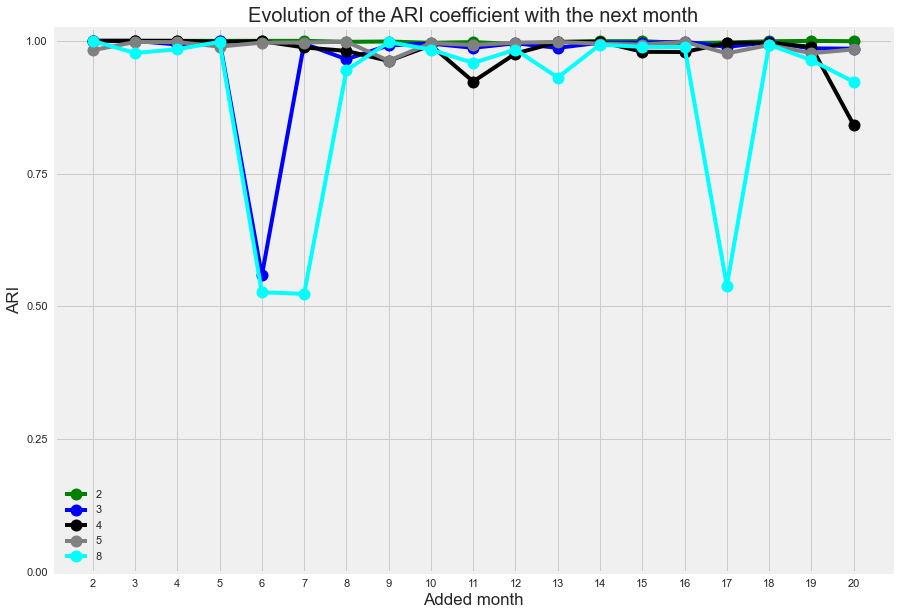

In [112]:
# Evolution of the ARI coefficient depending on the number of clusters

# Palette
color_palette=plt.cm.Dark2.colors

# Figure
plt.figure(figsize=(15,10))
plt.style.use("fivethirtyeight")
plt.plot(months_list, monthly_ARI_coefficients_dic_clusters['2'].values(), 'green', marker='o', markersize=12, label='2')
plt.plot(months_list, monthly_ARI_coefficients_dic_clusters['3'].values(),  'blue', marker='o', markersize=12, label='3')
plt.plot(months_list, monthly_ARI_coefficients_dic_clusters['4'].values(), 'black', marker='o', markersize=12, label='4')
plt.plot(months_list, monthly_ARI_coefficients_dic_clusters['5'].values(), 'grey', marker='o', markersize=12, label='5')
plt.plot(months_list, monthly_ARI_coefficients_dic_clusters['8'].values(), 'cyan', marker='o', markersize=12, label='8')

plt.xticks(months_list)
plt.yticks(np.linspace(0, 1, num=5))
plt.xlabel("Added month")
plt.ylabel("ARI")
plt.title(f"Evolution of the ARI coefficient with the next month", fontsize=20)
plt.legend()

# Saving
plt.savefig(f"projets\\05_olist_customer_segmentation\\production\\savefig\\clustering_results\\clustering_rfm\\maintenance\\ARI_coefs_evolution_next_month_all_clusters.png", dpi=300)
plt.show()

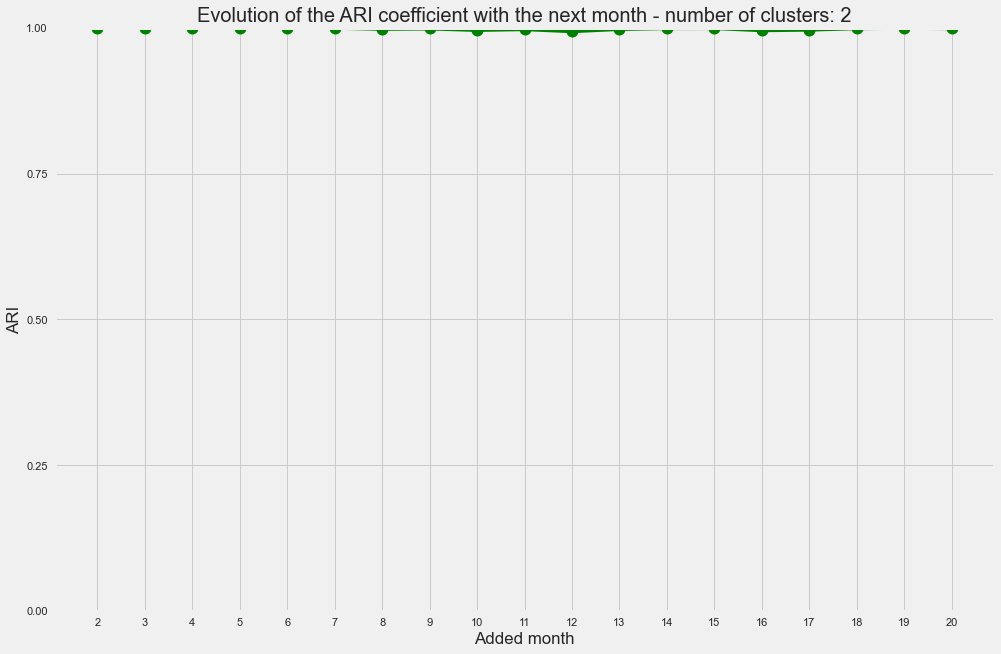

In [113]:
# Evolution of the ARI coefficient depending on the number of clusters
plt.figure(figsize=(15,10))
plt.style.use("fivethirtyeight")
plt.plot(months_list, monthly_ARI_coefficients_dic_clusters['2'].values(),'green', marker='o', markersize=12)
plt.xticks(months_list)
plt.yticks(np.linspace(0, 1, num=5))
plt.xlabel("Added month")
plt.ylabel("ARI")
plt.title(f"Evolution of the ARI coefficient with the next month - number of clusters: 2", fontsize=20)

# Saving
plt.savefig(f"projets\\05_olist_customer_segmentation\\production\\savefig\\clustering_results\\clustering_rfm\\maintenance\\ARI_coefs_evolution_next_month_2.png", dpi=300)
plt.show()

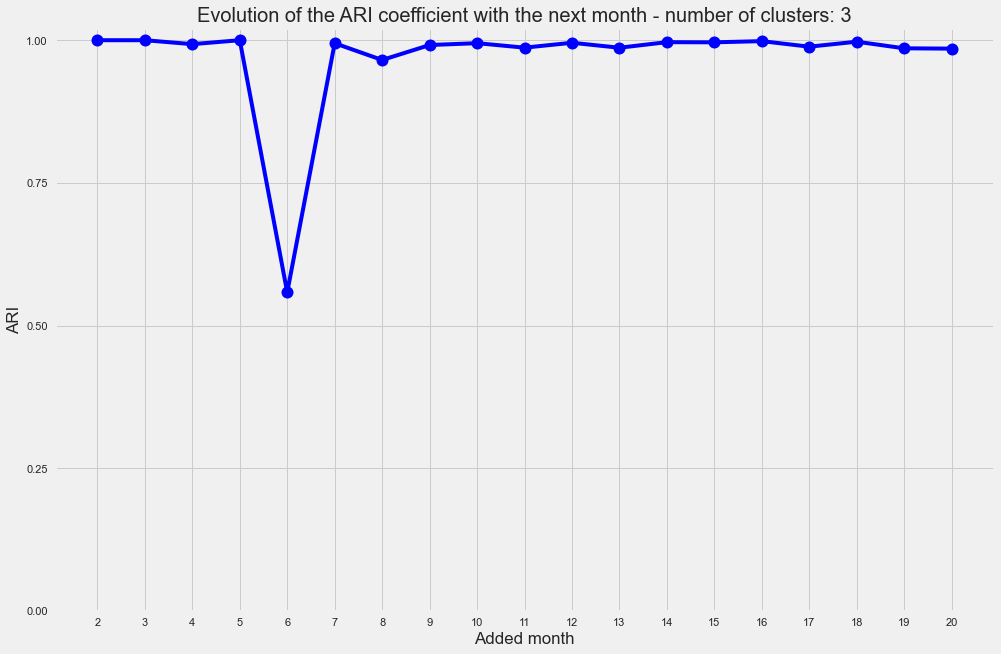

In [114]:
# Evolution of the ARI coefficient depending on the number of clusters
plt.figure(figsize=(15,10))
plt.style.use("fivethirtyeight")
plt.plot(months_list, monthly_ARI_coefficients_dic_clusters['3'].values(),'blue', marker='o', markersize=12)
plt.xticks(months_list)
plt.yticks(np.linspace(0, 1, num=5))
plt.xlabel("Added month")
plt.ylabel("ARI")
plt.title(f"Evolution of the ARI coefficient with the next month - number of clusters: 3", fontsize=20)

# Saving
plt.savefig(f"projets\\05_olist_customer_segmentation\\production\\savefig\\clustering_results\\clustering_rfm\\maintenance\\ARI_coefs_evolution_next_month_3.png", dpi=300)
plt.show()

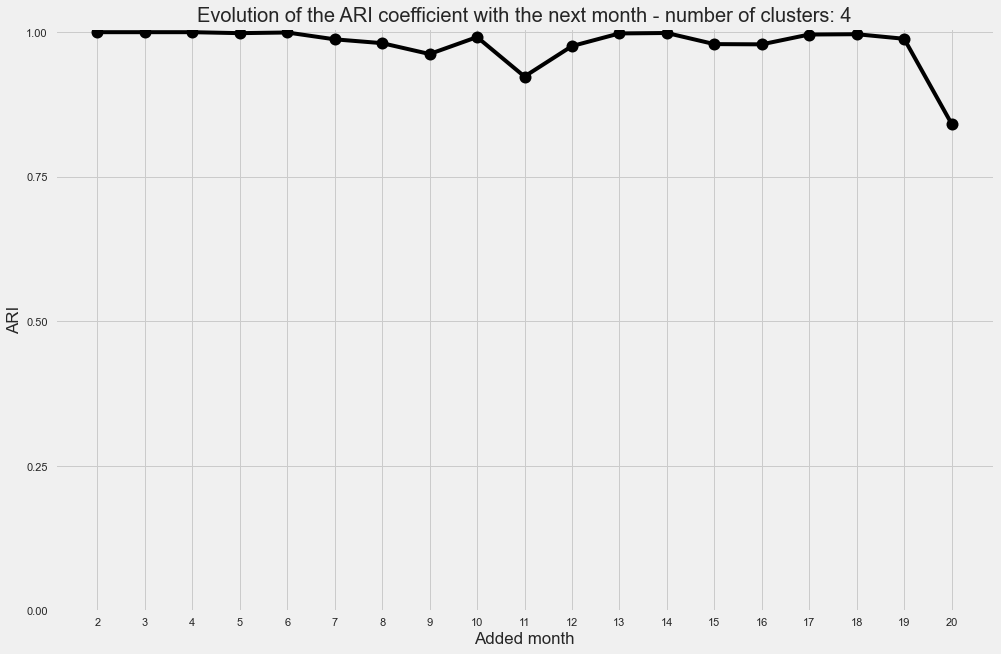

In [115]:
# Evolution of the ARI coefficient depending on the number of clusters
plt.figure(figsize=(15,10))
plt.style.use("fivethirtyeight")
plt.plot(months_list, monthly_ARI_coefficients_dic_clusters['4'].values(),'black', marker='o', markersize=12)
plt.xticks(months_list)
plt.yticks(np.linspace(0, 1, num=5))
plt.xlabel("Added month")
plt.ylabel("ARI")
plt.title(f"Evolution of the ARI coefficient with the next month - number of clusters: 4", fontsize=20)

# Saving
plt.savefig(f"projets\\05_olist_customer_segmentation\\production\\savefig\\clustering_results\\clustering_rfm\\maintenance\\ARI_coefs_evolution_next_month_4.png", dpi=300)
plt.show()

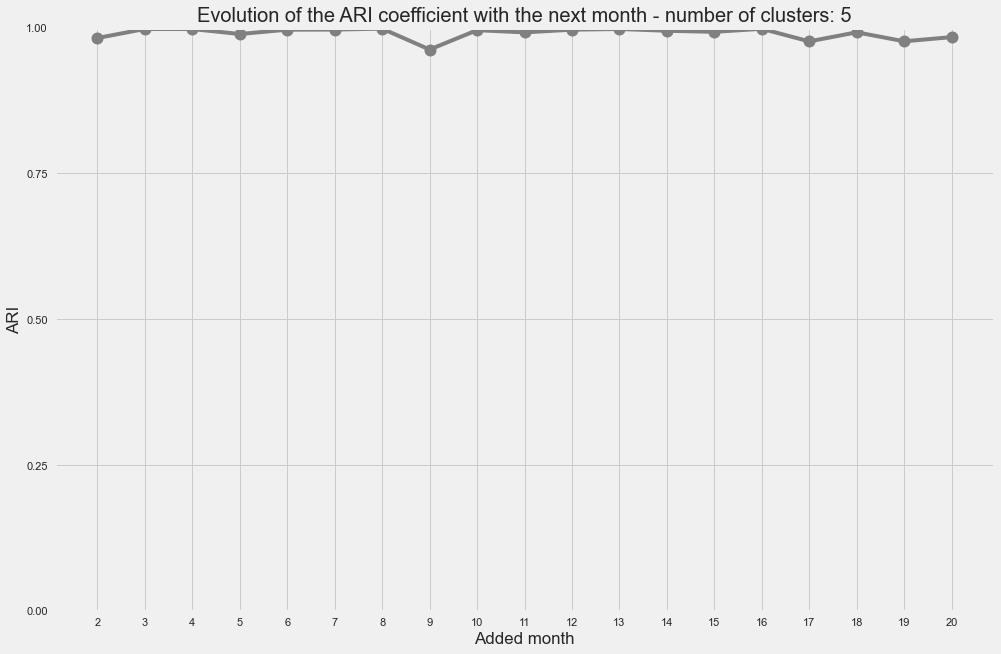

In [116]:
# Evolution of the ARI coefficient depending on the number of clusters
plt.figure(figsize=(15,10))
plt.style.use("fivethirtyeight")
plt.plot(months_list, monthly_ARI_coefficients_dic_clusters['5'].values(),'grey', marker='o', markersize=12)
plt.xticks(months_list)
plt.yticks(np.linspace(0, 1, num=5))
plt.xlabel("Added month")
plt.ylabel("ARI")
plt.title(f"Evolution of the ARI coefficient with the next month - number of clusters: 5", fontsize=20)

# Saving
plt.savefig(f"projets\\05_olist_customer_segmentation\\production\\savefig\\clustering_results\\clustering_rfm\\maintenance\\ARI_coefs_evolution_next_month_5.png", dpi=300)
plt.show()

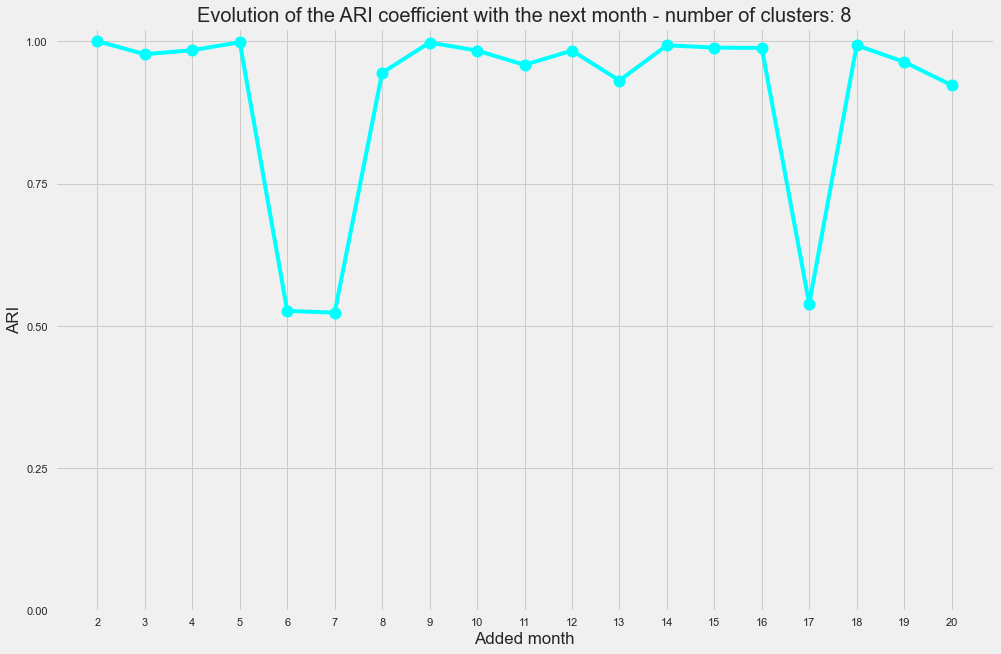

In [117]:
# Evolution of the ARI coefficient depending on the number of clusters
plt.figure(figsize=(15,10))
plt.style.use("fivethirtyeight")
plt.plot(months_list, monthly_ARI_coefficients_dic_clusters['8'].values(),'cyan', marker='o', markersize=12)
plt.xticks(months_list)
plt.yticks(np.linspace(0, 1, num=5))
plt.xlabel("Added month")
plt.ylabel("ARI")
plt.title(f"Evolution of the ARI coefficient with the next month - number of clusters: 8", fontsize=20)

# Saving
plt.savefig(f"projets\\05_olist_customer_segmentation\\production\\savefig\\clustering_results\\clustering_rfm\\maintenance\\ARI_coefs_evolution_next_month_8.png", dpi=300)
plt.show()